<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Другой-способ-устранения-дисбаланса" data-toc-modified-id="Другой-способ-устранения-дисбаланса-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Другой способ устранения дисбаланса</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Проект направлен на работу с дисбалансом и оценку ROC-кривой
Применяется OHE

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_absolute_error, roc_auc_score, roc_curve, mean_squared_error

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Имеем пропуски в Tenure. Скорее всего пропуски стоят у новых клиентов, появившихся менее года назад, поэтому логичнее всего поставить нули:

In [4]:
data['Tenure'] = data['Tenure'].fillna(0) 

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Иеем 4 категориальных признака -- страна, пол, наличие кредитки, активность. Их нужно будет преобразовать прямым кодированием. Остальным потребуется масштабирование (проведем после разбиения на выборки)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
data.shape

(10000, 14)

In [8]:
len(transformed[0])

17

In [5]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Geography', 'Gender']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_df.head()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,1,15634602,Hargrave,619,42,2.0,0.0,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,3,15619304,Onio,502,42,8.0,159660.8,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,4,15701354,Boni,699,39,1.0,0.0,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.1,0


Некоторые столбцы не годятся для предсказания, поэтому удалим их при создании таблицы признаков

In [76]:
target = data['Exited']
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [77]:
features = pd.get_dummies(features, columns=['Geography', 'Gender'], drop_first=True)

In [78]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)


In [79]:
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

## Исследование задачи

Получим результаты без балансировки
1. Логистическая регрессия

In [12]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


0.2913165266106442


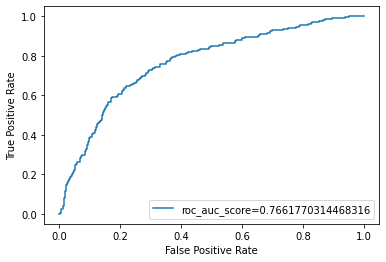

In [80]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
print(f1_score(target_valid, model.predict(features_valid)))


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()


График показывает, что модель лучше случайной, но по f1 видно, что есть возможность для улучшения

2. Дерево

0.5773672055427252 5


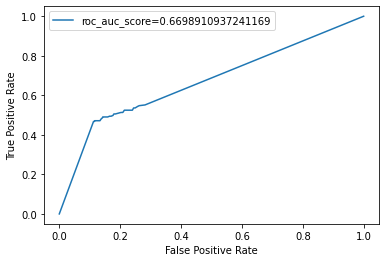

In [81]:
best_result = 0
best_depth = 0 
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    if f1_score(target_valid, model.predict(features_valid)) > best_result:
        best_result = f1_score(target_valid, model.predict(features_valid))
        best_depth = depth
print(best_result, best_depth)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Лучшим оказалось дерево с глубиной 7, для которого результат f1 больше, чем у линейной регрессии, но график немного хуже

3. Лес

0.601123595505618 14 90


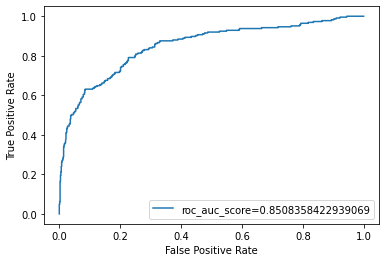

In [47]:
best_result = 0
best_depth = 0 
best_est = 0
for depth in range(1, 16, 1):
    for est in range(20, 100, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        if f1_score(target_valid, model.predict(features_valid)) > best_result:
            best_result = f1_score(target_valid, model.predict(features_valid))
            best_depth = depth
            best_est = est
print(best_result, best_depth, best_est)


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Для леса деревьев лучше всего оказалась глубина 15 при количестве 70.
На фоне линейной модели и одного дерева метрика f1 и график стали значительно лучше.


Пока что результат неудовлетворительный. Посмотрим улушится ли он путем борьбы с дисбалансом

## Борьба с дисбалансом

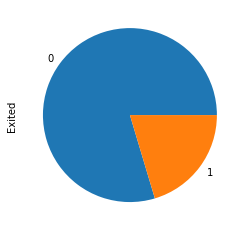

In [82]:
plot = data.groupby('Exited')['Exited'].count().plot.pie()

В целевом признаке неравномерное распределение -- где-то четверть клиентов, ушедших из банка. Воспользуемся методом upsample

In [83]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


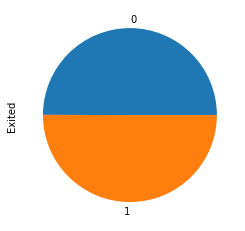

In [84]:
plot = target_upsampled.groupby(target_upsampled).count().plot.pie()

Посмотрим, как изменится результат после балансировки:
1. Линейная модель

0.5132978723404255


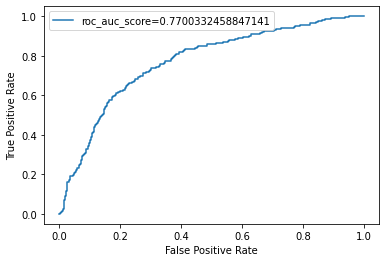

In [85]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
print(f1_score(target_valid, model.predict(features_valid)))


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()


Заметно выросла метрика f1

2. Дерево

0.6035889070146819 5


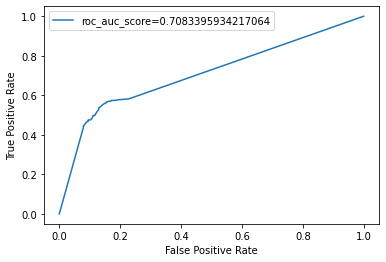

In [86]:
best_result = 0
best_depth = 0 
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    if f1_score(target_valid, model.predict(features_valid)) > best_result:
        best_result = f1_score(target_valid, model.predict(features_valid))
        best_depth = depth
print(best_result, best_depth)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Немного выросло значение f1, поменялась глубина

3. Лес

0.6538461538461539 13 30


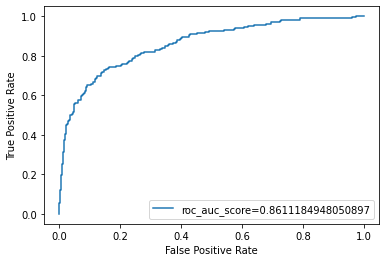

In [87]:
best_result = 0
best_depth = 0 
best_est = 0
for depth in range(1, 16, 1):
    for est in range(20, 100, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(features_upsampled, target_upsampled)
        if f1_score(target_valid, model.predict(features_valid)) > best_result:
            best_result = f1_score(target_valid, model.predict(features_valid))
            best_depth = depth
            best_est = est
print(best_result, best_depth, best_est)


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Примечательно, что метрика f1 улучшилась незначительно,  увеличилось количество (с 70 до 90), roc_auc_score сильно вырос. Осталось выбрать лучший порог:

0.6566604127579738 0.48


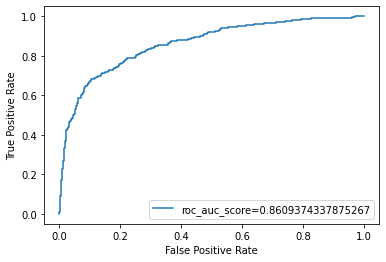

In [88]:
model = RandomForestClassifier(n_estimators=best_est, max_depth=best_depth, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_result = 0
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    if f1_score(target_valid, predicted_valid) > best_result:
        best_result = f1_score(target_valid, predicted_valid)
        best_threshold = threshold

print(best_result, best_threshold)



probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Порог незначительно улучшил метрики

## Другой способ устранения дисбаланса

Для начала сбросим выборки

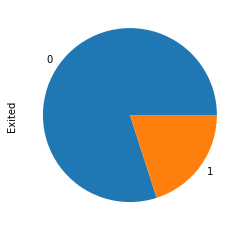

In [89]:
plot = target_train.groupby(target_train).count().plot.pie()

In [90]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

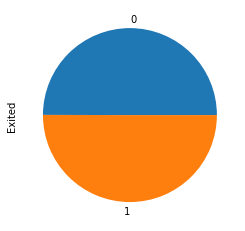

In [91]:
plot = target_downsampled.groupby(target_downsampled).count().plot.pie()

Посмотрим на поведение леса

0.5940594059405941 0.48


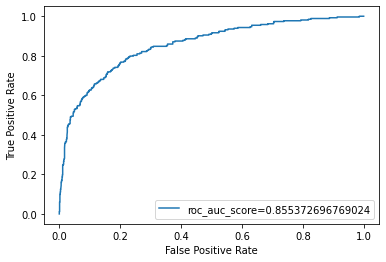

In [92]:
model = RandomForestClassifier(n_estimators=best_est, max_depth=best_depth, random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_result = 0
for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    if f1_score(target_valid, predicted_valid) > best_result:
        best_result = f1_score(target_valid, predicted_valid)
        best_threshold = threshold

print(best_result, best_threshold)



probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr,tpr, label='roc_auc_score='+str(roc_auc_score(target_valid, probabilities_one_valid)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

Результат оказался хуже, чем у метода upsample, поэтому для тестирования его не будем использовать

## Тестирование модели

Вот модель до:

In [93]:
model = RandomForestClassifier(n_estimators=15, max_depth=70, random_state=12345)
model.fit(features_train, target_train)

RandomForestClassifier(max_depth=70, n_estimators=15, random_state=12345)

In [94]:
print(f1_score(target_test, model.predict(features_test)))
print(roc_auc_score(target_test, model.predict(features_test)))

0.5616438356164384
0.7041193010946709


Создадим модель с лучшими параметрами:

In [98]:
model = RandomForestClassifier(n_estimators=15, max_depth=30, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
model

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=15,
                       random_state=12345)

In [101]:
print(f1_score(target_test, model.predict_proba(features_test)[:, 1]>0.46))
print(roc_auc_score(target_test, model.predict_proba(features_test)[:, 1]>0.46))

0.6184448462929476
0.7581010164802117


## Вывод

В проекте были протестированы три типа моделей (Линейная, Дерево и Лес) с целью поиска наилучшей по метрике f1. Лучше всего показал себя лес деревьев со следующими параметрами:
depth = 11 
n_estimators = 90
threshold = 0.5
upsample
 

In [97]:
fig = dict({
    "data": [{"type": "bar",
              "x": features_upsampled.columns,
              "y": model.feature_importances_}],
    "layout": {"title": {"text": "Распределение весов признаков"}}
})
pio.show(fig)

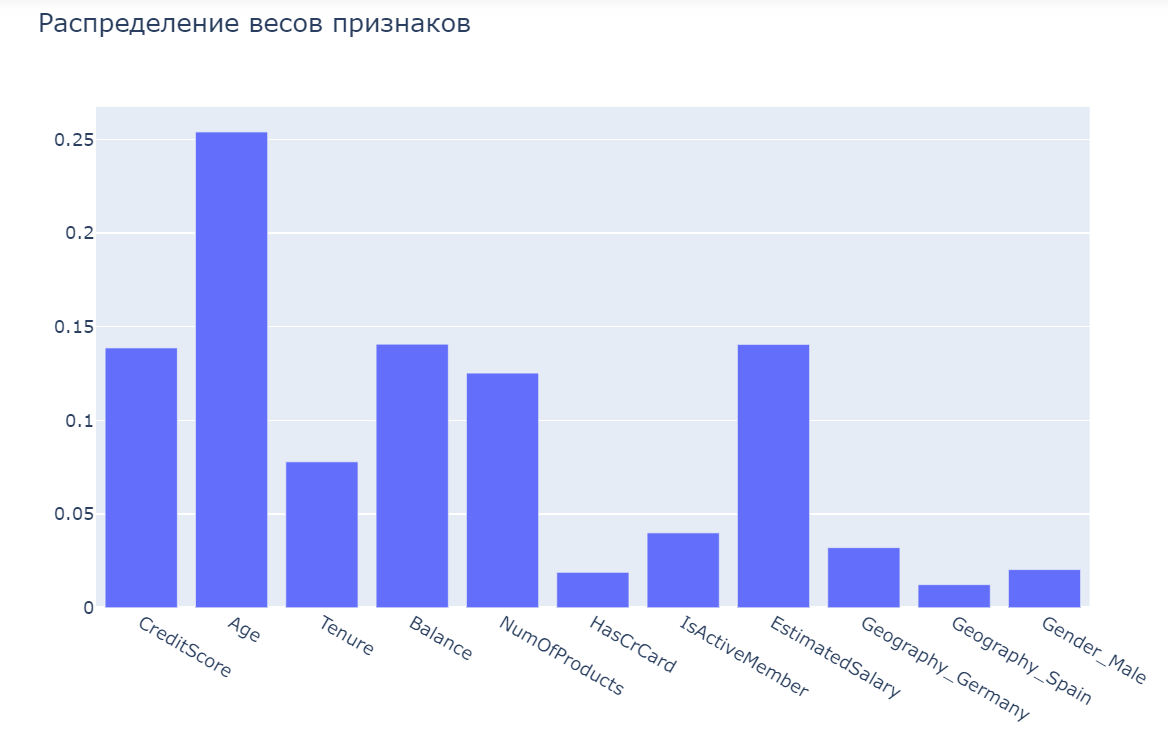

Важнее всего оказался возраст клиентов, затем количество продуктов в банке. Наличие кредитной карты и пол оказались наименее важными